# Installing packages

In [1]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib pandas numpy sns scipy sklearn nbconvert openpyxl termcolor

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy import stats
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from termcolor import colored

In [4]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = mean(data1), mean(data2)
 # calculate standard errors
 se1, se2 = sem(data1), sem(data2)
 # standard error on the difference between the samples
 sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p

## Toy Samples

In [5]:
mu2, sigma2 = 25, 5 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 5000)
mu, sigma = 30, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)
zz = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

# Population

In [6]:
df = pd.read_excel('DBGeneticExpressionCarcass.xlsx')
df['Group'] = df['Amostra'].apply(lambda x: x[0])
df['Day'] = df['Amostra'].apply(lambda x: int(x[1]) if x[1] != 'u' else 0)
df.head()

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.731661,33.665260,25.279843,A,1
1,A1-1,19.851553,32.612957,25.306593,A,1
2,A1-2,19.448266,27.550795,24.992273,A,1
3,A1-2,19.733913,27.364021,24.987568,A,1
4,A1-3,18.480774,28.844547,24.236149,A,1


In [7]:
df[df['VG'].isna()]

,Amostra,RPL32,VGR,VG,Group,Day


In [8]:
df[df['Amostra'] == 'Pu-1']['VG'].mean() 

34.08478205348986

In [9]:
# df[df['Amostra'] == 'Pu-1']['VG'] = df[df['Amostra'] == 'Pu-1']['VG'].mean() 

In [10]:
df.describe()

,RPL32,VGR,VG,Day
count,78.000000,78.000000,78.000000,78.000000
mean,19.876526,29.664344,25.870927,4.000000
std,1.014678,2.232465,3.226914,3.006486
min,18.463029,24.188826,21.891192,0.000000
25%,19.096639,27.913504,23.845645,1.000000
50%,19.626455,29.592190,25.584168,4.000000
75%,20.647191,31.281618,26.415266,8.000000
max,22.333588,34.734440,35.986200,8.000000


In [11]:
df_mean = df # df.groupby(['Amostra', 'Group']).mean().reset_index()

In [12]:
df_mean

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.731661,33.665260,25.279843,A,1
1,A1-1,19.851553,32.612957,25.306593,A,1
2,A1-2,19.448266,27.550795,24.992273,A,1
3,A1-2,19.733913,27.364021,24.987568,A,1
4,A1-3,18.480774,28.844547,24.236149,A,1
...,...,...,...,...,...,...
73,D8-1,21.674982,32.221210,27.392739,D,8
74,D8-2,20.920304,32.135807,25.942998,D,8
75,D8-2,21.002150,31.960926,26.077807,D,8
76,D8-3,22.317273,30.891573,30.746798,D,8


Each distribution is a total of eggs layed during 10 days for each female individual

In [13]:
df_mean['DCT_VG'] =  df_mean['VG'] - df_mean['RPL32']
df_mean['DCT_VGR'] =  df_mean['VGR'] - df_mean['RPL32']
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR
0,A1-1,19.731661,33.665260,25.279843,A,1,5.548182,13.933599
1,A1-1,19.851553,32.612957,25.306593,A,1,5.455040,12.761404
2,A1-2,19.448266,27.550795,24.992273,A,1,5.544006,8.102528
3,A1-2,19.733913,27.364021,24.987568,A,1,5.253656,7.630108
4,A1-3,18.480774,28.844547,24.236149,A,1,5.755375,10.363774


In [14]:
df_mean['DDCT_VG'] =  df_mean['DCT_VG'] - df_mean['DCT_VG'].min() 
df_mean['DDCT_VGR'] =  df_mean['DCT_VGR'] - df_mean['DCT_VGR'].min()
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR
0,A1-1,19.731661,33.665260,25.279843,A,1,5.548182,13.933599,2.652499,8.723828
1,A1-1,19.851553,32.612957,25.306593,A,1,5.455040,12.761404,2.559357,7.551634
2,A1-2,19.448266,27.550795,24.992273,A,1,5.544006,8.102528,2.648323,2.892758
3,A1-2,19.733913,27.364021,24.987568,A,1,5.253656,7.630108,2.357972,2.420338
4,A1-3,18.480774,28.844547,24.236149,A,1,5.755375,10.363774,2.859692,5.154003


In [15]:
df_mean['EXP_DDCT_VG'] =  df_mean['DDCT_VG'].apply(lambda x: 2**(-x)) 
df_mean['EXP_DDCT_VGR'] =  df_mean['DDCT_VGR'].apply(lambda x: 2**(-x)) 
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.731661,33.665260,25.279843,A,1,5.548182,13.933599,2.652499,8.723828,0.159044,0.002365
1,A1-1,19.851553,32.612957,25.306593,A,1,5.455040,12.761404,2.559357,7.551634,0.169651,0.005330
2,A1-2,19.448266,27.550795,24.992273,A,1,5.544006,8.102528,2.648323,2.892758,0.159505,0.134646
3,A1-2,19.733913,27.364021,24.987568,A,1,5.253656,7.630108,2.357972,2.420338,0.195065,0.186812
4,A1-3,18.480774,28.844547,24.236149,A,1,5.755375,10.363774,2.859692,5.154003,0.137768,0.028086


## Sanity Test

In [16]:
def interpret_ttest(a, b, alpha=0.05):
    t_stat, df, cv, p = independent_ttest(a, b, alpha)
    print('t=%.3f, df=%d, cv=%.5f, p=%.8f' % (t_stat, df, cv, p))
#     # interpret via critical value
#     if abs(t_stat) <= cv:
#         print('Accept null hypothesis (Same distributions).')
#     else:
#         print('Reject the null hypothesis (Different distributions).')
    # interpret via p-value
    if p > alpha:
        print(colored('Accept null hypothesis (Same distributions).', 'green'))
    else:
        print(colored('Reject the null hypothesis (Different distributions).', 'red'))

In [17]:
interpret_ttest(s,s2)

t=50.008, df=9998, cv=1.64501, p=0.00000000
Reject the null hypothesis (Different distributions).


In [18]:
def interpret_kwtest(a, b, alpha = 0.05):
    stat, p = stats.kruskal(a, b)
    print('Statistics=%.3f, p=%.8f' % (stat, p))
    # interpret

    if p > alpha:
        print(colored('Same distributions (fail to reject H0)', 'green'))
    else:
        print(colored('Different distributions (reject H0)', 'red'))

In [19]:
interpret_kwtest(s,s2)

Statistics=2034.623, p=0.00000000
Different distributions (reject H0)


In [20]:
from scipy.stats import shapiro
# normality test
# interpret results
def interpret_normaltest(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    if p > alpha:
        print(colored('Sample looks Gaussian (fail to reject H0)', 'green'))
    else:
        print(colored('Sample does not look Gaussian (reject H0)', 'red'))



In [21]:
interpret_normaltest(s)

Statistics=1.000, p=0.616
Sample looks Gaussian (fail to reject H0)


In [22]:
interpret_normaltest(s2)

Statistics=1.000, p=0.422
Sample looks Gaussian (fail to reject H0)


In [23]:
interpret_normaltest(zz)

Statistics=0.236, p=0.000
Sample does not look Gaussian (reject H0)


## Normality Tests

In [24]:
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.731661,33.665260,25.279843,A,1,5.548182,13.933599,2.652499,8.723828,0.159044,0.002365
1,A1-1,19.851553,32.612957,25.306593,A,1,5.455040,12.761404,2.559357,7.551634,0.169651,0.005330
2,A1-2,19.448266,27.550795,24.992273,A,1,5.544006,8.102528,2.648323,2.892758,0.159505,0.134646
3,A1-2,19.733913,27.364021,24.987568,A,1,5.253656,7.630108,2.357972,2.420338,0.195065,0.186812
4,A1-3,18.480774,28.844547,24.236149,A,1,5.755375,10.363774,2.859692,5.154003,0.137768,0.028086


In [25]:
groups = df_mean.Group.unique()
groups

array(['A', 'P', 'B', 'C', 'D'], dtype=object)

In [26]:
distributions_vg  = {g: df_mean[df_mean['Group'] == g]['EXP_DDCT_VG'].values for g in groups}
distributions_vgr  = {g: df_mean[df_mean['Group'] == g]['EXP_DDCT_VGR'].values for g in groups}

## Normality Test for VG 

In [27]:
df_mean

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.731661,33.665260,25.279843,A,1,5.548182,13.933599,2.652499,8.723828,0.159044,0.002365
1,A1-1,19.851553,32.612957,25.306593,A,1,5.455040,12.761404,2.559357,7.551634,0.169651,0.005330
2,A1-2,19.448266,27.550795,24.992273,A,1,5.544006,8.102528,2.648323,2.892758,0.159505,0.134646
3,A1-2,19.733913,27.364021,24.987568,A,1,5.253656,7.630108,2.357972,2.420338,0.195065,0.186812
4,A1-3,18.480774,28.844547,24.236149,A,1,5.755375,10.363774,2.859692,5.154003,0.137768,0.028086
...,...,...,...,...,...,...,...,...,...,...,...,...
73,D8-1,21.674982,32.221210,27.392739,D,8,5.717757,10.546229,2.822074,5.336458,0.141407,0.024749
74,D8-2,20.920304,32.135807,25.942998,D,8,5.022695,11.215503,2.127011,6.005733,0.228932,0.015563
75,D8-2,21.002150,31.960926,26.077807,D,8,5.075657,10.958776,2.179974,5.749006,0.220680,0.018594
76,D8-3,22.317273,30.891573,30.746798,D,8,8.429525,8.574300,5.533841,3.364529,0.021585,0.097090


In [28]:
color_map = {
    'P': 'black', 
    'A': 'Green', 
    'B': 'Blue', 
    'C': 'Red', 
    'D': 'Yellow'}

In [29]:
df_day_stats = df_mean.groupby(['Group', 'Day']).describe().reset_index()
df_day_stats.columns = ['_'.join(tuple(map(str, t))) for t in df_day_stats.columns.values]
df_day_stats['EXP_DDCT_VG_error'] = df_day_stats['EXP_DDCT_VG_std'] / (df_day_stats['EXP_DDCT_VG_count']**(1/2))
df_day_stats['EXP_DDCT_VGR_error'] = df_day_stats['EXP_DDCT_VGR_std'] / (df_day_stats['EXP_DDCT_VGR_count']**(1/2))
df_day_stats['GroupDay'] = df_day_stats['Group_'].astype(str) + df_day_stats['Day_'].astype(str)
df_day_stats['Color'] = df_day_stats['Group_'].map(lambda x: color_map[x])

df_day_stats.to_excel('carcass_stats.xlsx')
df_day_stats[['GroupDay',  'EXP_DDCT_VG_error', 'EXP_DDCT_VGR_error', 'EXP_DDCT_VGR_mean', 'EXP_DDCT_VG_mean', 'EXP_DDCT_VGR_std', 'EXP_DDCT_VGR_max', 'EXP_DDCT_VGR_50%']]


,GroupDay,EXP_DDCT_VG_error,EXP_DDCT_VGR_error,EXP_DDCT_VGR_mean,EXP_DDCT_VG_mean,EXP_DDCT_VGR_std,EXP_DDCT_VGR_max,EXP_DDCT_VGR_50%
0,A1,0.007775,0.031191,0.066095,0.162536,0.076403,0.186812,0.033708
1,A4,0.135168,0.063168,0.128911,0.289555,0.154730,0.358906,0.047619
2,A8,0.026491,0.019586,0.059679,0.161317,0.047975,0.117512,0.056260
3,B1,0.114438,0.005020,0.032962,0.391594,0.012295,0.044899,0.038443
4,B4,0.076916,0.007107,0.034175,0.279046,0.017410,0.051007,0.039433
5,B8,0.021428,0.006322,0.043094,0.118351,0.015486,0.068872,0.041992
6,C1,0.126807,0.052613,0.128272,0.635333,0.128875,0.300280,0.089258
7,C4,0.106867,0.180947,0.375491,0.330706,0.443229,1.000000,0.129620
8,C8,0.036285,0.023215,0.202803,0.210479,0.056864,0.268164,0.209218
9,D1,0.010093,0.006964,0.080073,0.394562,0.017057,0.107374,0.071512


In [30]:
df_day_stats

,Group_,Day_,RPL32_count,RPL32_mean,RPL32_std,RPL32_min,RPL32_25%,RPL32_50%,RPL32_75%,RPL32_max,...,EXP_DDCT_VGR_std,EXP_DDCT_VGR_min,EXP_DDCT_VGR_25%,EXP_DDCT_VGR_50%,EXP_DDCT_VGR_75%,EXP_DDCT_VGR_max,EXP_DDCT_VG_error,EXP_DDCT_VGR_error,GroupDay,Color
0,A,1,6.0,19.305846,0.612761,18.480774,18.803750,19.589964,19.733350,19.851553,...,0.076403,0.002365,0.011019,0.033708,0.110817,0.186812,0.007775,0.031191,A1,Green
1,A,4,6.0,19.173173,0.300637,18.741230,18.985633,19.220986,19.435063,19.442232,...,0.154730,0.011205,0.021286,0.047619,0.233610,0.358906,0.135168,0.063168,A4,Green
2,A,8,6.0,19.994086,1.057613,18.614890,19.130799,20.549109,20.711413,20.827867,...,0.047975,0.007781,0.019964,0.056260,0.098363,0.117512,0.026491,0.019586,A8,Green
3,B,1,6.0,19.499622,0.500920,18.837182,19.088298,19.681318,19.867556,19.977653,...,0.012295,0.016216,0.023468,0.038443,0.040583,0.044899,0.114438,0.005020,B1,Blue
4,B,4,6.0,20.267300,0.443130,19.849127,19.972466,20.077321,20.631810,20.845875,...,0.017410,0.010736,0.020289,0.039433,0.047757,0.051007,0.076916,0.007107,B4,Blue
5,B,8,6.0,20.458601,0.527043,19.753849,20.044317,20.635778,20.846778,20.961928,...,0.015486,0.023971,0.034219,0.041992,0.048081,0.068872,0.021428,0.006322,B8,Blue
6,C,1,6.0,19.090542,0.098048,18.961353,19.019157,19.103596,19.147660,19.221348,...,0.128875,0.007251,0.026312,0.089258,0.231003,0.300280,0.126807,0.052613,C1,Red
7,C,4,6.0,18.680481,0.216085,18.463029,18.548979,18.589843,18.841780,18.979055,...,0.443229,0.047937,0.073634,0.129620,0.700502,1.000000,0.106867,0.180947,C4,Red
8,C,8,6.0,20.179538,0.509729,19.497034,19.791983,20.289867,20.563259,20.720048,...,0.056864,0.125094,0.163094,0.209218,0.245356,0.268164,0.036285,0.023215,C8,Red
9,D,1,6.0,19.102684,0.167814,18.901079,18.959442,19.129989,19.221415,19.300561,...,0.017057,0.063876,0.071234,0.071512,0.089147,0.107374,0.010093,0.006964,D1,Yellow


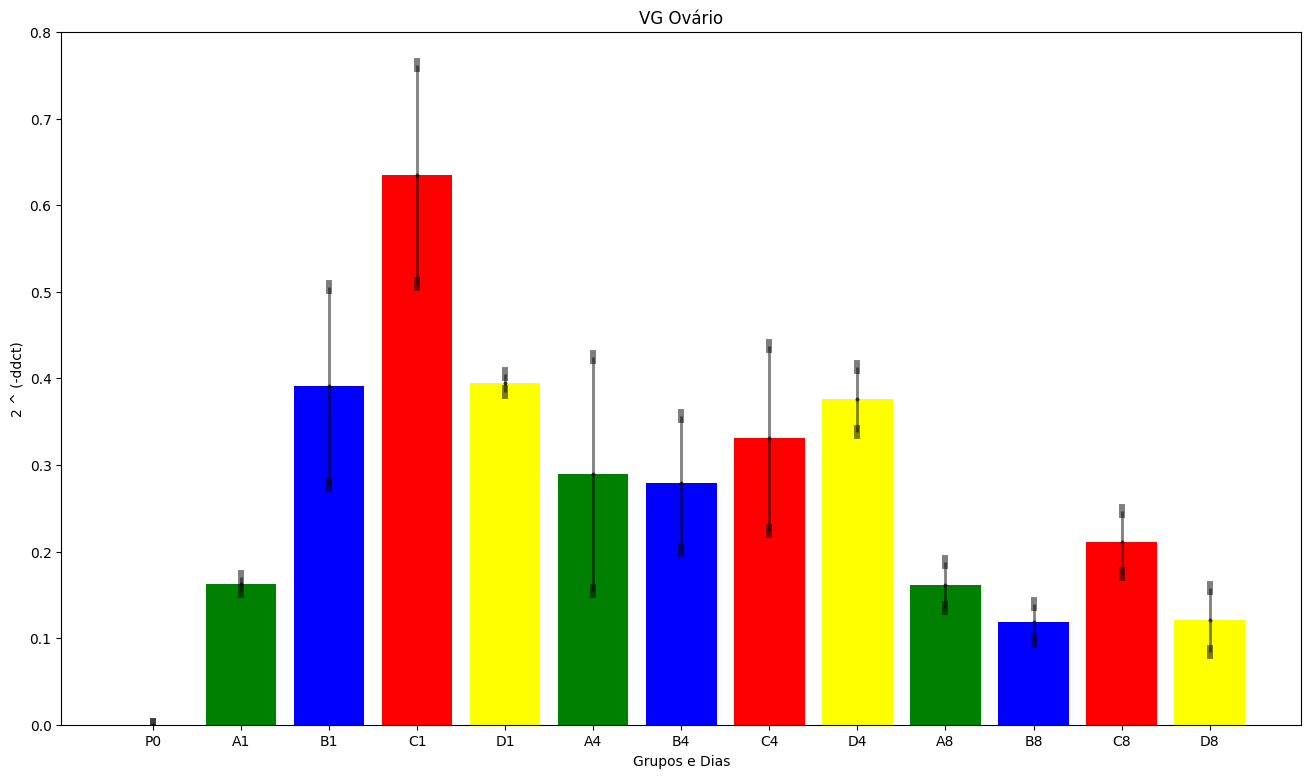

In [31]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VG Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VG'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

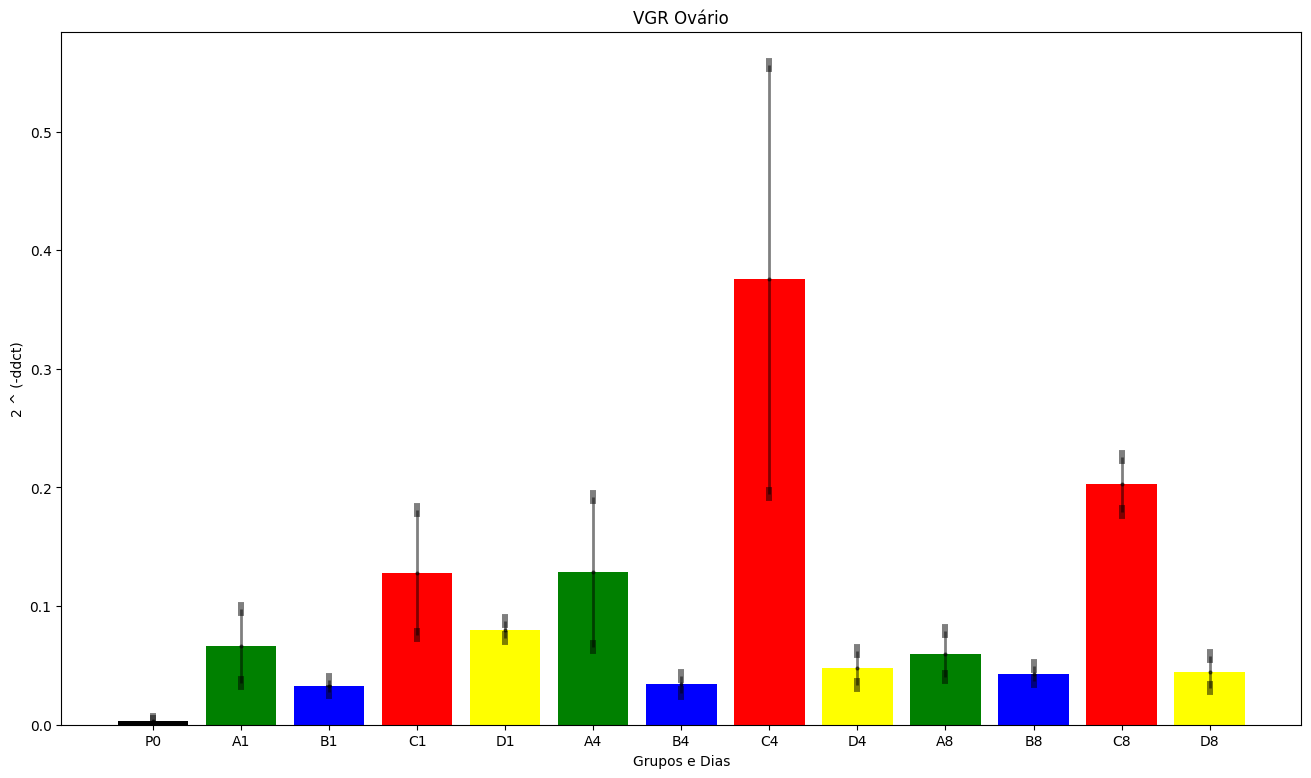

In [32]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VGR Ovário')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VGR'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

<Axes: xlabel='Day', ylabel='EXP_DDCT_VG'>

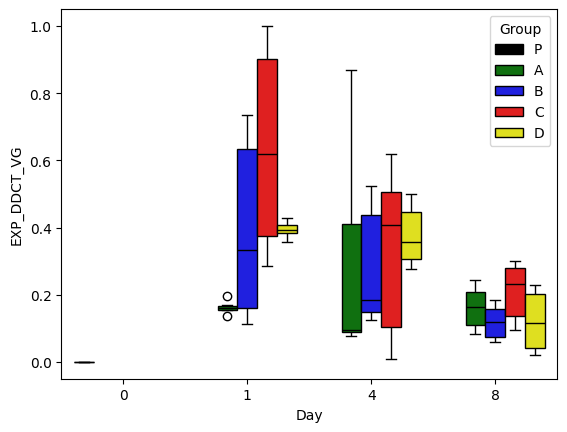

In [33]:
import seaborn as sns
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)


<Axes: xlabel='Day', ylabel='EXP_DDCT_VGR'>

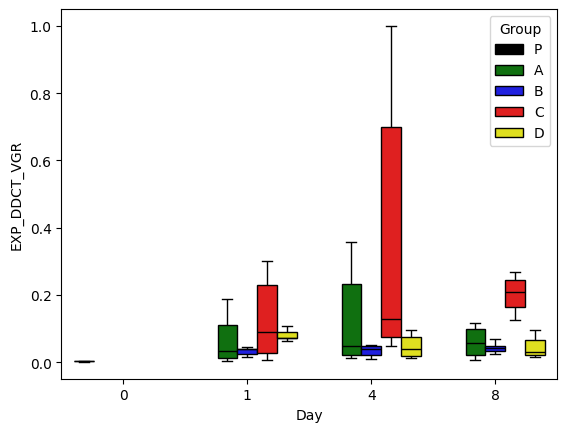

In [34]:
import seaborn as sns
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)


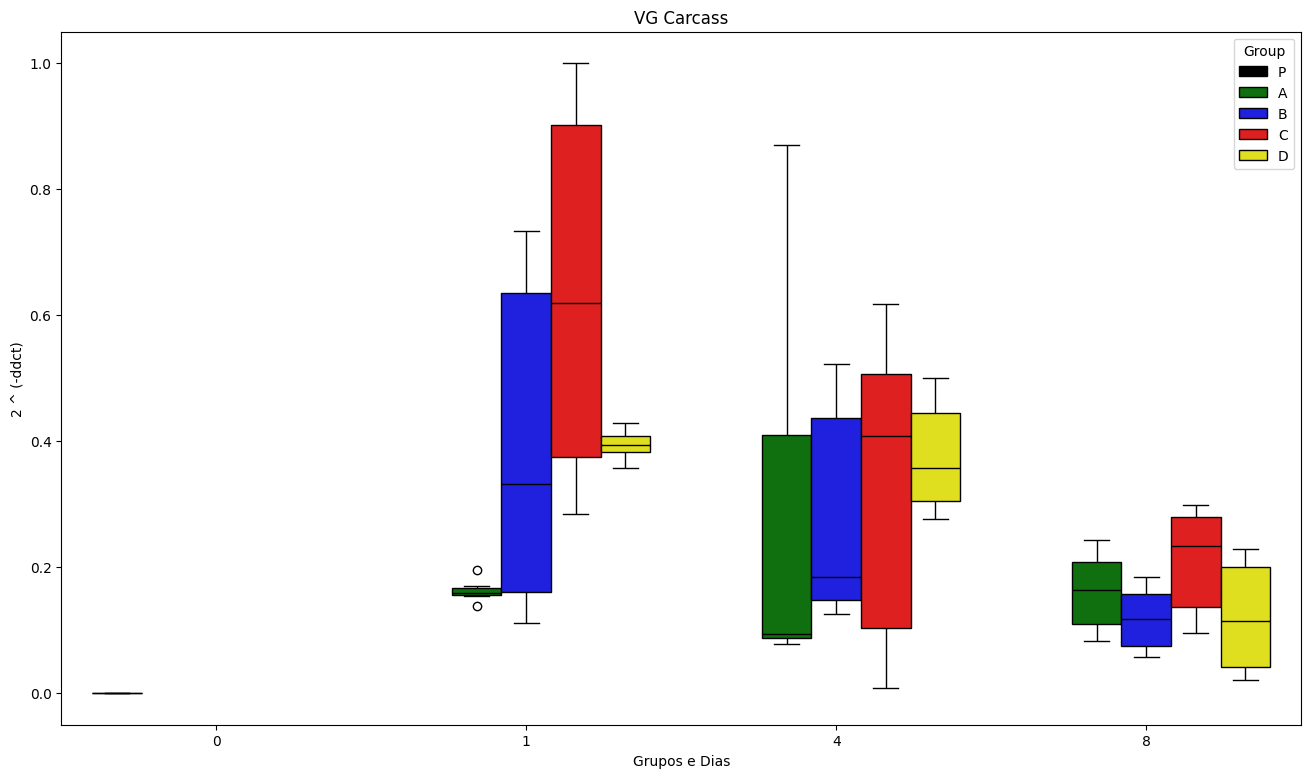

In [35]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VG Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)
plt.savefig('vg_carcaca.png')
plt.savefig('vg_carcaca.pdf')

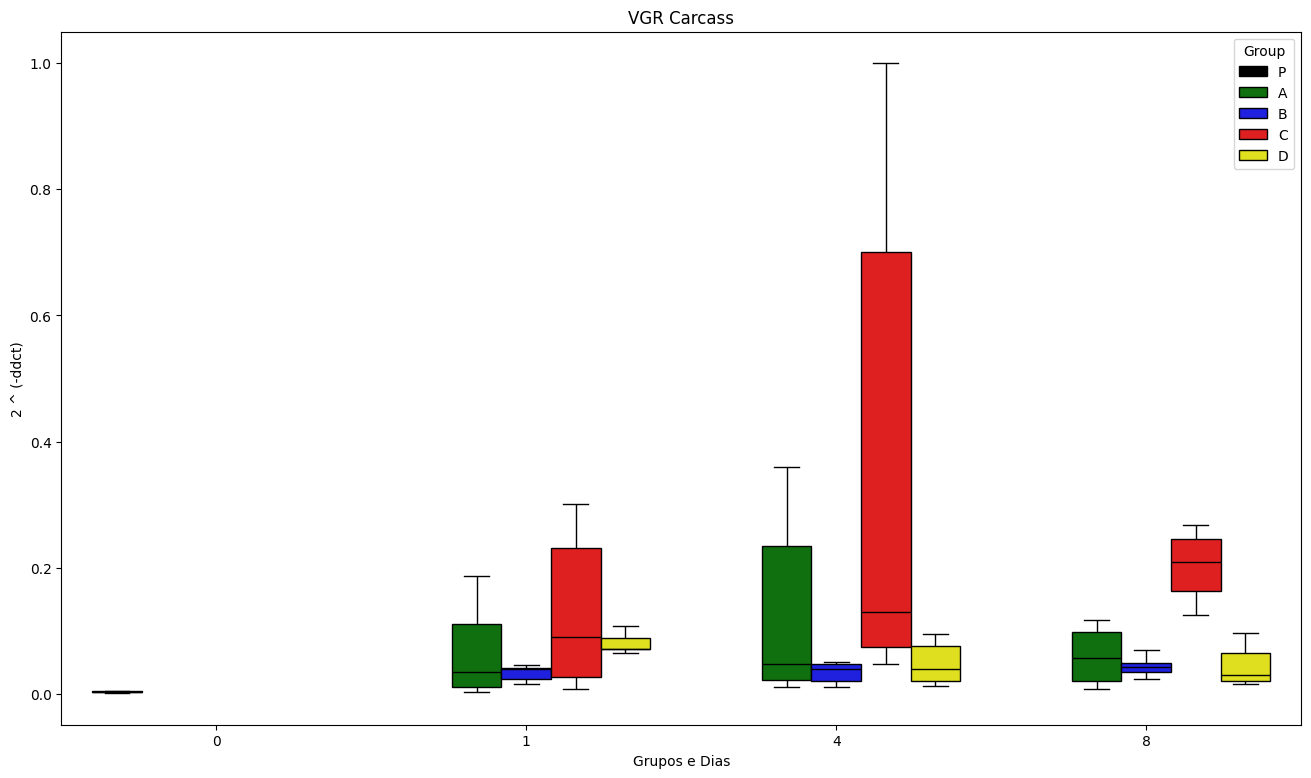

In [54]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VGR Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df_mean, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)
plt.savefig('vgr_carcaca.pdf')

In [37]:
df_mean.to_excel('carcass_exp_ddct.xlsx')

In [38]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vg.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
#     plt.hist(v, bins=7)
#     plt.gca().set(ylabel='Frequency')
#     plt.title(k)
#     plt.show()
    print('\n\n')

Distributions A
Statistics=0.605, p=0.000
Sample does not look Gaussian (reject H0)



Distributions P
Statistics=0.850, p=0.158
Sample looks Gaussian (fail to reject H0)



Distributions B
Statistics=0.794, p=0.001
Sample does not look Gaussian (reject H0)



Distributions C
Statistics=0.928, p=0.177
Sample looks Gaussian (fail to reject H0)



Distributions D
Statistics=0.917, p=0.115
Sample looks Gaussian (fail to reject H0)





## Normality Test for VGR


Distributions A
Statistics=0.774, p=0.001
Sample does not look Gaussian (reject H0)


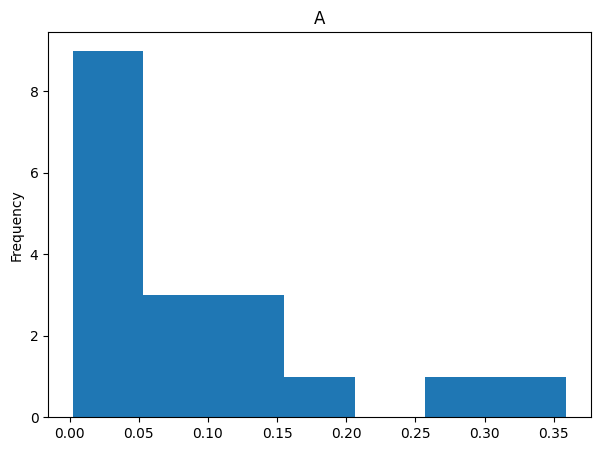




Distributions P
Statistics=0.886, p=0.298
Sample looks Gaussian (fail to reject H0)


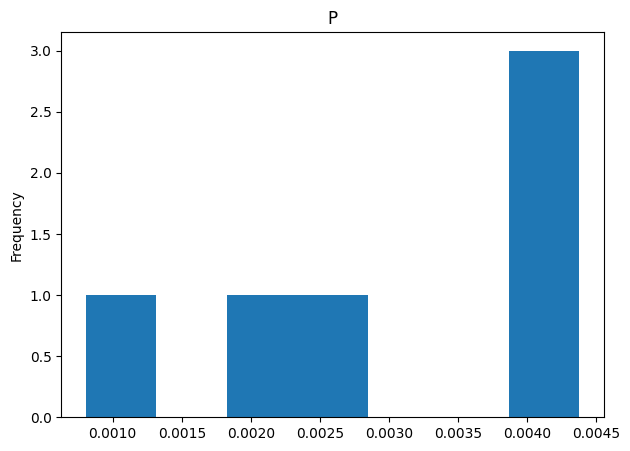




Distributions B
Statistics=0.954, p=0.499
Sample looks Gaussian (fail to reject H0)


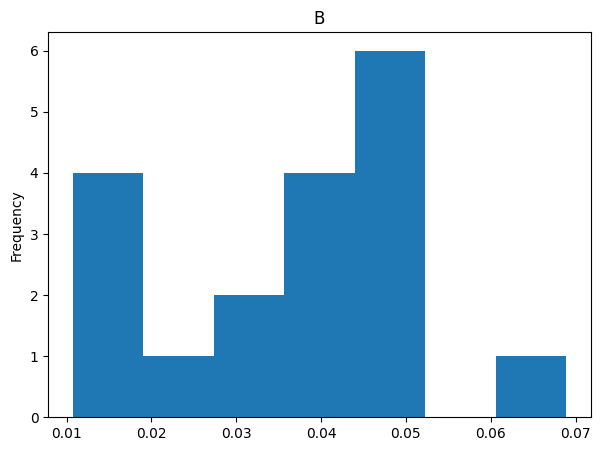




Distributions C
Statistics=0.694, p=0.000
Sample does not look Gaussian (reject H0)


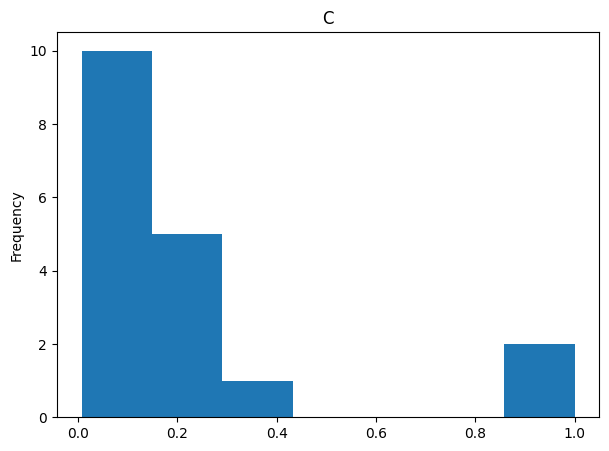




Distributions D
Statistics=0.910, p=0.086
Sample looks Gaussian (fail to reject H0)


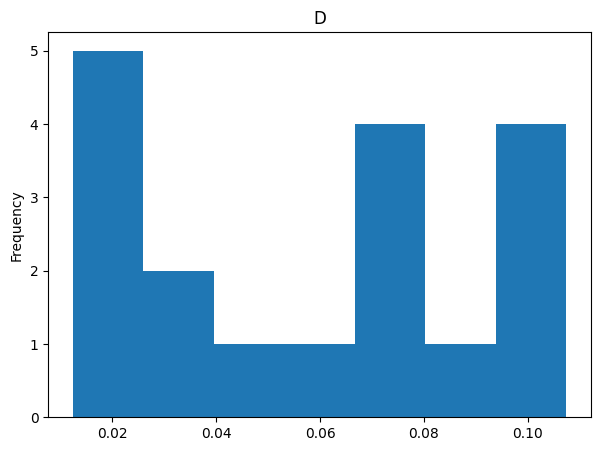

In [39]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vgr.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
    plt.hist(v, bins=7)
    plt.gca().set(ylabel='Frequency')
    plt.title(k)
    plt.show()
    print('\n\n')

## Comparison Scenarios

In [40]:
scenarios_vgr_inter_group = {
'A-B': (distributions_vgr['A'], distributions_vgr['B']), 
'A-C': (distributions_vgr['A'], distributions_vgr['C']), 
'A-D': (distributions_vgr['A'], distributions_vgr['D']), 
'A-P': (distributions_vgr['A'], distributions_vgr['P']), 
'B-C': (distributions_vgr['B'], distributions_vgr['C']), 
'B-D': (distributions_vgr['B'], distributions_vgr['D']), 
'B-P': (distributions_vgr['B'], distributions_vgr['P']), 
'C-D': (distributions_vgr['C'], distributions_vgr['D']), 
'C-P': (distributions_vgr['C'], distributions_vgr['P']), 
'D-P': (distributions_vgr['D'], distributions_vgr['P']), 
}

In [41]:
intra_group_days = [(1,4) ,
(1,8),
(4,8)]


In [42]:
scenarios_vgr_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[0])]['VGR'].values, 
                              df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[1])]['VGR'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [43]:
scenarios_vg_inter_group = {
'A-B': (distributions_vg['A'], distributions_vg['B']), 
'A-C': (distributions_vg['A'], distributions_vg['C']), 
'A-D': (distributions_vg['A'], distributions_vg['D']), 
'A-P': (distributions_vg['A'], distributions_vg['P']), 
'B-C': (distributions_vg['B'], distributions_vg['C']), 
'B-D': (distributions_vg['B'], distributions_vg['D']), 
'B-P': (distributions_vg['B'], distributions_vg['P']), 
'C-D': (distributions_vg['C'], distributions_vg['D']), 
'C-P': (distributions_vg['C'], distributions_vg['P']), 
'D-P': (distributions_vg['D'], distributions_vg['P']), 
}

In [44]:
scenarios_vg_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[0])]['VG'].values, 
                              df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[1])]['VG'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [45]:
scenarios_vg_inter_group['A-B']

(array([0.15904438, 0.16965117, 0.15950539, 0.19506515, 0.13776756,
        0.15418375, 0.09909119, 0.08690795, 0.09027376, 0.07826293,
        0.86953017, 0.51326163, 0.24250009, 0.22164061, 0.08252701,
        0.09406522, 0.15714524, 0.17002302]),
 array([0.29953063, 0.36588364, 0.11350278, 0.1119476 , 0.72423569,
        0.73446482, 0.51785669, 0.52258019, 0.13986198, 0.12528318,
        0.1941591 , 0.17453209, 0.06287639, 0.05828334, 0.18460113,
        0.16930091, 0.12468561, 0.11035748]))

In [46]:
scenarios_vg_intra_groups['A-1-4']

(array([25.27984347, 25.30659286, 24.99227289, 24.98756846, 24.23614899,
        24.18187252]),
 array([25.67222718, 25.8359709 , 25.39128597, 25.54337068, 22.53960725,
        22.5991474 ]))

In [47]:
scenarios_vgr_inter_group['A-B']

(array([0.00236519, 0.00533006, 0.13464592, 0.1868124 , 0.02808604,
        0.03933064, 0.35890582, 0.29242307, 0.01569281, 0.01120502,
        0.05717176, 0.03806562, 0.11231474, 0.11751208, 0.05601364,
        0.05650682, 0.00778099, 0.0079476 ]),
 array([0.04114556, 0.04489855, 0.01862706, 0.01621567, 0.03799099,
        0.03889462, 0.03123667, 0.04780015, 0.05100729, 0.04762923,
        0.01663919, 0.01073643, 0.03810106, 0.0458824 , 0.06887178,
        0.04881336, 0.03292519, 0.02397057]))

In [48]:
scenarios_vgr_intra_groups['A-1-4']

(array([33.66526031, 32.612957  , 27.5507946 , 27.3640213 , 28.84454727,
        28.46688461]),
 array([26.12953758, 26.39956093, 30.22957611, 30.66164207, 28.78055573,
        28.66636848]))

### Statistical Tests VG


#### Inter Group VG

In [49]:
for k, v in scenarios_vg_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=0.626, p=0.42896442
Same distributions (fail to reject H0)



Scenario A-C
Statistics=6.247, p=0.01243865
Different distributions (reject H0)



Scenario A-D
Statistics=4.766, p=0.02903114
Different distributions (reject H0)



Scenario A-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)



Scenario B-C
Statistics=1.851, p=0.17368447
Same distributions (fail to reject H0)



Scenario B-D
Statistics=1.157, p=0.28205590
Same distributions (fail to reject H0)



Scenario B-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)



Scenario C-D
Statistics=0.441, p=0.50642755
Same distributions (fail to reject H0)



Scenario C-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)



Scenario D-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)





#### Intra Group VG

In [50]:
for k, v in scenarios_vg_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario A-1-8
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario A-4-8
Statistics=1.641, p=0.20018480
Same distributions (fail to reject H0)



Scenario P-1-4
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-1-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-4-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario B-1-4
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario B-1-8
Statistics=6.564, p=0.01040562
Different distributions (reject H0)



Scenario B-4-8
Statistics=5.026, p=0.02497468
Different distributions (reject H0)



Scenario C-1-4
Statistics=0.641, p=0.42333964
Same distributions (fail to reject H0)



Scenario C-1-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario C-4-8
Statistics=0.923, p=0.33666837
Same distributions (fail to rej

### Statistical Tests VGR

#### Inter Group VGR

In [51]:
for k, v in scenarios_vgr_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=0.484, p=0.48639802
Same distributions (fail to reject H0)



Scenario A-C
Statistics=6.406, p=0.01137093
Different distributions (reject H0)



Scenario A-D
Statistics=0.081, p=0.77583767
Same distributions (fail to reject H0)



Scenario A-P
Statistics=11.111, p=0.00085812
Different distributions (reject H0)



Scenario B-C
Statistics=14.899, p=0.00011343
Different distributions (reject H0)



Scenario B-D
Statistics=2.919, p=0.08754650
Same distributions (fail to reject H0)



Scenario B-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)



Scenario C-D
Statistics=10.010, p=0.00155692
Different distributions (reject H0)



Scenario C-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)



Scenario D-P
Statistics=12.960, p=0.00031822
Different distributions (reject H0)





#### Intra Group VGR

In [52]:
for k, v in scenarios_vgr_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=0.410, p=0.52183939
Same distributions (fail to reject H0)



Scenario A-1-8
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario A-4-8
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)



Scenario P-1-4
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-1-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-4-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario B-1-4
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)



Scenario B-1-8
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)



Scenario B-4-8
Statistics=0.000, p=1.00000000
Same distributions (fail to reject H0)



Scenario C-1-4
Statistics=1.256, p=0.26233168
Same distributions (fail to reject H0)



Scenario C-1-8
Statistics=0.103, p=0.74877404
Same distributions (fail to reject H0)



Scenario C-4-8
Statistics=0.923, p=0.33666837
Same distributions (fa